# Proyek Klasifikasi Gambar: 🍚Multi-Class Rice Image Dataset
- **Nama:** Dondi Setiawan
- **Email:** mc359d5y2184@student.devacademy.id
- **ID Dicoding:** MC359D5Y2184

Link Dataset : https://www.kaggle.com/datasets/bhaveshmittal/multi-class-rice-image-dataset

## Import Semua Packages/Library yang Digunakan

In [46]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns
from google.colab import files
import tensorflowjs as tfjs
import zipfile
from tqdm import tqdm as tq
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation

### Data Loading

In [4]:
mkdir -p /root/.kaggle

In [5]:
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d bhaveshmittal/multi-class-rice-image-dataset
!unzip multi-class-rice-image-dataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Validation/Jasmine/10001.jpg  
  inflating: Validation/Jasmine/10002.jpg  
  inflating: Validation/Jasmine/10003.jpg  
  inflating: Validation/Jasmine/10004.jpg  
  inflating: Validation/Jasmine/10005.jpg  
  inflating: Validation/Jasmine/10006.jpg  
  inflating: Validation/Jasmine/10007.jpg  
  inflating: Validation/Jasmine/10008.jpg  
  inflating: Validation/Jasmine/10009.jpg  
  inflating: Validation/Jasmine/10010.jpg  
  inflating: Validation/Jasmine/10011.jpg  
  inflating: Validation/Jasmine/10012.jpg  
  inflating: Validation/Jasmine/10013.jpg  
  inflating: Validation/Jasmine/10014.jpg  
  inflating: Validation/Jasmine/10015.jpg  
  inflating: Validation/Jasmine/10016.jpg  
  inflating: Validation/Jasmine/10017.jpg  
  inflating: Validation/Jasmine/10018.jpg  
  inflating: Validation/Jasmine/10019.jpg  
  inflating: Validation/Jasmine/10020.jpg  
  inflating: Validation/Jasmine/10021.jpg  
  inflating: Vali

### Data Preprocessing

In [7]:
train_dir = "Train"
test_dir = "Test"

combined_dir = "dataset"
os.makedirs(combined_dir, exist_ok=True)

In [8]:
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

In [9]:
directory = 'dataset/'

unique_sizes = set()
total_images = 0

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except Exception as e:
                print(f"Error opening {img_path}: {e}")

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

print(f"\nTotal: {total_images}")

Karacadag: 12500
- (150, 150)
---------------
Basmati: 12500
- (150, 150)
---------------
Jasmine: 12500
- (150, 150)
---------------
Arborio: 12500
- (150, 150)
---------------
Ipsala: 12500
- (150, 150)
---------------

Total: 62500


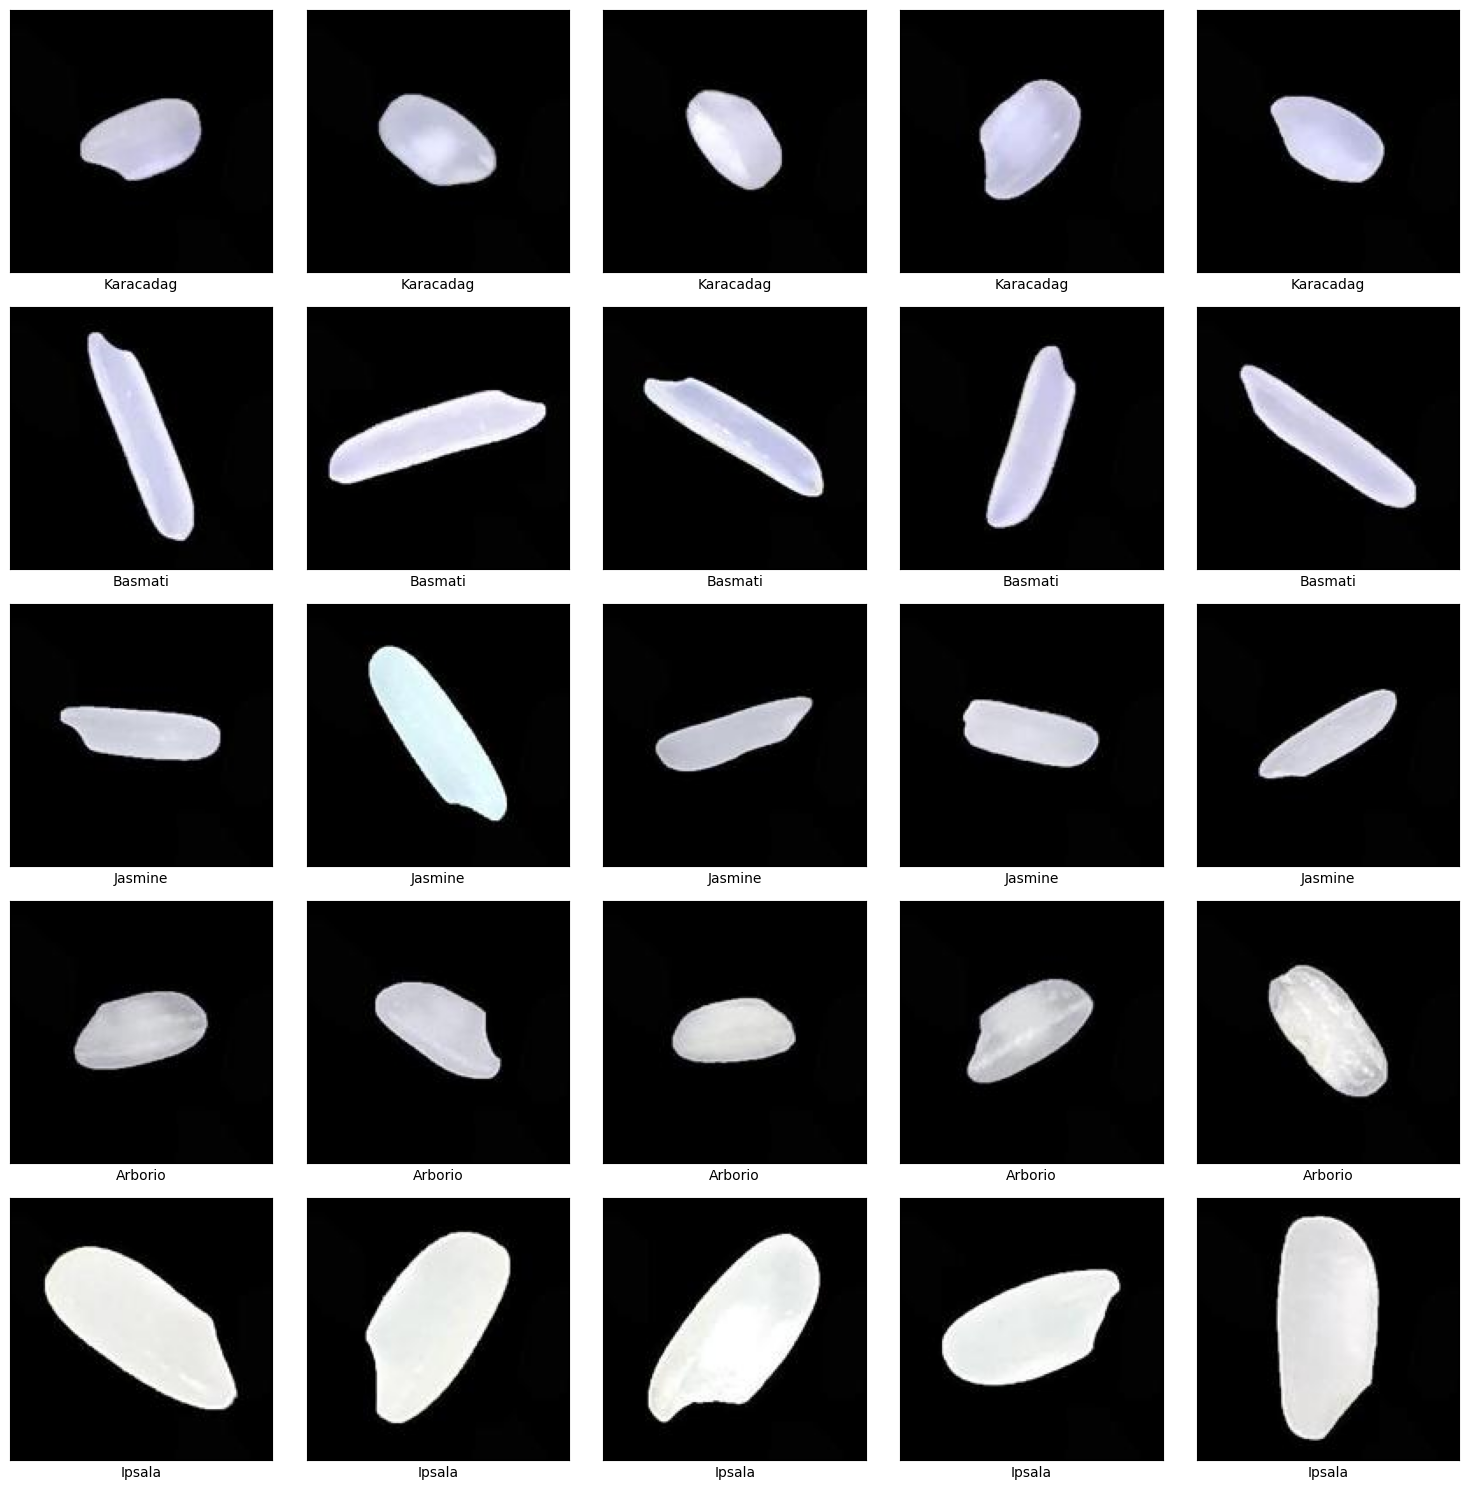

In [10]:
lung_image = {}

path_sub = os.path.join("dataset")
for i in os.listdir(path_sub):
    lung_image[i] = os.listdir(os.path.join(path_sub, i))

path_sub = "dataset/"

fig, axs = plt.subplots(len(lung_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(lung_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

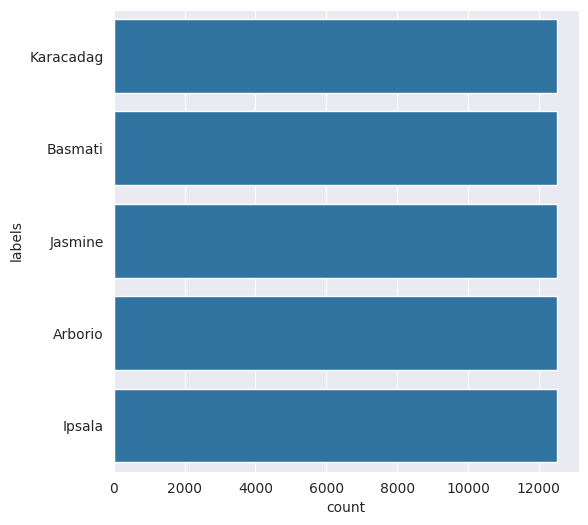

In [11]:
lung_path = "dataset/"

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

In [12]:
total = len(distribution_train)
print(f"Total data: {total}")

Total data: 62500


#### Split Dataset

In [13]:
mypath= 'dataset/'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
df.groupby(['labels']).size()

,0
labels,
Arborio,12500
Basmati,12500
Ipsala,12500
Jasmine,12500
Karacadag,12500


In [14]:
X= df['path']
y= df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

In [15]:
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'test'})

In [16]:
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print(df_all.groupby(['set', 'labels']).size(), '\n')

set    labels   
test   Arborio       2505
       Basmati       2466
       Ipsala        2539
       Jasmine       2488
       Karacadag     2502
train  Arborio       9995
       Basmati      10034
       Ipsala        9961
       Jasmine      10012
       Karacadag     9998
dtype: int64 



In [17]:
datasource_path = "dataset/"
dataset_path = "Dataset-Final/"

for index, row in tq(df_all.iterrows()):
    file_path = row['path']
    if os.path.exists(file_path) == False:
      file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
      os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    if os.path.exists(file_dest) == False:
      shutil.copy2(file_path,file_dest)

62500it [00:17, 3633.98it/s]


In [18]:
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"

classes = [d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))]

for class_name in classes:
    train_path = os.path.join(TRAIN_DIR, class_name)
    test_path = os.path.join(TEST_DIR, class_name)

    train_count = len(os.listdir(train_path)) if os.path.exists(train_path) else 0
    print(f"Total number of {class_name} images in training set: {train_count}")

    test_count = len(os.listdir(test_path)) if os.path.exists(test_path) else 0
    print(f"Total number of {class_name} images in test set: {test_count}")

Total number of Karacadag images in training set: 9998
Total number of Karacadag images in test set: 2502
Total number of Basmati images in training set: 10034
Total number of Basmati images in test set: 2466
Total number of Jasmine images in training set: 10012
Total number of Jasmine images in test set: 2488
Total number of Arborio images in training set: 9995
Total number of Arborio images in test set: 2505
Total number of Ipsala images in training set: 9961
Total number of Ipsala images in test set: 2539


## Modelling

In [19]:
TRAIN_DIR = 'Dataset-Final/train'
TEST_DIR = 'Dataset-Final/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    validation_split=0.2
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 40002 images belonging to 5 classes.
Found 9998 images belonging to 5 classes.
Found 12500 images belonging to 5 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 1), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 377ms/step - accuracy: 0.8667 - loss: 1.2069 - val_accuracy: 0.2056 - val_loss: 30.5757 - learning_rate: 0.0010
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 345ms/step - accuracy: 0.9453 - loss: 0.5035 - val_accuracy: 0.3463 - val_loss: 5.3830 - learning_rate: 0.0010
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 348ms/step - accuracy: 0.9513 - loss: 0.4050 - val_accuracy: 0.9391 - val_loss: 0.4411 - learning_rate: 0.0010
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 345ms/step - accuracy: 0.9517 - loss: 0.3904 - val_accuracy: 0.9437 - val_loss: 0.4183 - learning_rate: 0.0010
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.9538 - loss: 0.3837 - val_accuracy: 0.3999 - val_loss: 11.7182 - learning_rate: 0.0010
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 342ms/step - accuracy: 0.9503 - loss: 0.4895 - val_accuracy: 0.8786 - val_loss: 0.6150 - learning_rate: 0.0010
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 347ms/step - accu

In [22]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy : {test_acc}")

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9810 - loss: 0.1585
Test Accuracy : 0.9785599708557129


## Evaluasi dan Visualisasi

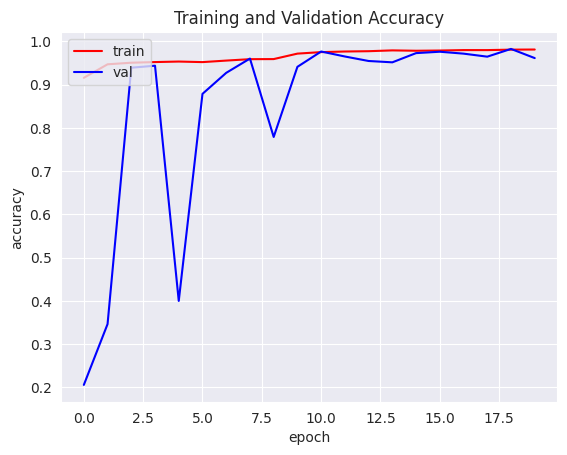

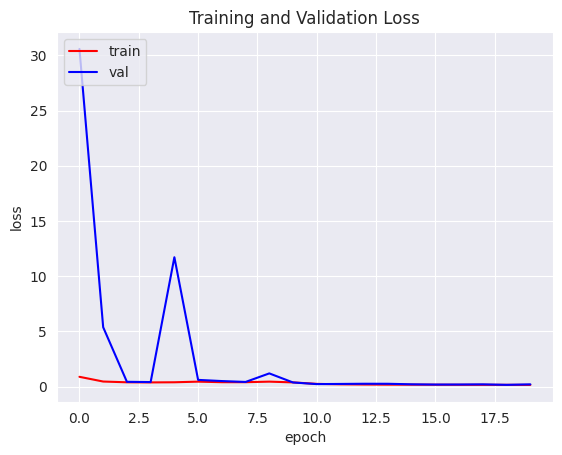

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
test_steps = test_generator.samples // test_generator.batch_size
predictions = model.predict(test_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step


              precision    recall  f1-score   support

     Arborio       0.96      0.98      0.97      2505
     Basmati       0.99      0.98      0.99      2466
      Ipsala       1.00      0.98      0.99      2539
     Jasmine       0.97      0.99      0.98      2488
   Karacadag       0.98      0.96      0.97      2502

    accuracy                           0.98     12500
   macro avg       0.98      0.98      0.98     12500
weighted avg       0.98      0.98      0.98     12500



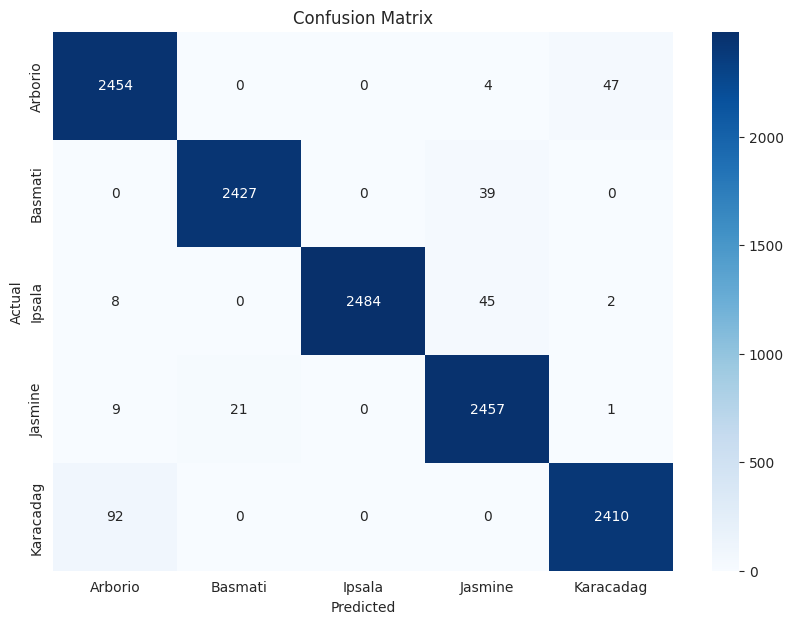

In [26]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Konversi Model

**Konvesi Ke SavedModel**

In [28]:
os.makedirs('saved_model', exist_ok=True)

In [33]:
model.export('saved_model/')

Saved artifact at 'saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139797163557712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163558480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163560784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163562128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163561936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163559824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163563088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163564816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163565008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163565584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163564048: T

In [49]:
!zip -r saved_model.zip saved_model
files.download('saved_model.zip')

  adding: saved_model/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: saved_model/variables/variables.index (deflated 69%)
  adding: saved_model/saved_model.pb (deflated 87%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Konversi Ke TF-Lite**

In [34]:
class_labels = {v: k for k, v in train_generator.class_indices.items()}

with open('labels.txt', 'w') as f:
    for i in range(len(class_labels)):
        f.write(f"{class_labels[i]}\n")

In [35]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpq7kco7jj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139797163557712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163558480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163560784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163562128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163561936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163559824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163563088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163564816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163565008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139797163565584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13979716356404

In [40]:
with zipfile.ZipFile('tflite.zip', 'w') as zipf:
    zipf.write('model.tflite')
    zipf.write('labels.txt')

**Konvesi ke TFJS**

In [37]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [47]:
tfjs.converters.save_keras_model(model, 'tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


In [48]:
!zip -r tfjs_model.zip tfjs_model
files.download('tfjs_model.zip')

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard3of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard11of21.bin (deflated 5%)
  adding: tfjs_model/group1-shard18of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard2of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard14of21.bin (deflated 5%)
  adding: tfjs_model/group1-shard5of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard20of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard10of21.bin (deflated 5%)
  adding: tfjs_model/group1-shard1of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard16of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard6of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard13of21.bin (deflated 5%)
  adding: tfjs_model/group1-shard7of21.bin (deflated 5%)
  adding: tfjs_model/group1-shard21of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard15of21.bin (deflated 6%)
  adding: tfjs_model/group1-shard12of21.bin (deflated 5%)
  adding: tfjs_model/group1-shard17of21.bin 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

In [61]:
with open('labels.txt', 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

input = interpreter.get_input_details()
output = interpreter.get_output_details()

In [68]:
def predict_image(img_path, interpreter, class_labels):
    img = image.load_img(img_path, target_size=(150, 150), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32)

    interpreter.set_tensor(input[0]['index'], img_array)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output[0]['index'])

    predicted_class_idx = np.argmax(output_data)
    predicted_label = class_labels[predicted_class_idx]
    confidence = np.max(output_data)

    return predicted_label, confidence


Prediksi 1 jenis Arborio

In [69]:
label, confidence = predict_image("/content/Prediksi/Arborio/10002.jpg", interpreter, class_labels)
print(f"Predicted: {label} (Confidence: {confidence:.2f})")

Predicted: Arborio (Confidence: 1.00)


Prediksi 2 jenis Basmati

In [70]:
label, confidence = predict_image("/content/Prediksi/Basmati/10021.jpg", interpreter, class_labels)
print(f"Predicted: {label} (Confidence: {confidence:.2f})")

Predicted: Basmati (Confidence: 1.00)


Prediksi 3 jenis Ipsala

In [71]:
label, confidence = predict_image("/content/Prediksi/Ipsala/10007.jpg", interpreter, class_labels)
print(f"Predicted: {label} (Confidence: {confidence:.2f})")

Predicted: Ipsala (Confidence: 1.00)


Prediksi 4 jenis Jasmine

In [72]:
label, confidence = predict_image("/content/Prediksi/Jasmine/10030.jpg", interpreter, class_labels)
print(f"Predicted: {label} (Confidence: {confidence:.2f})")

Predicted: Jasmine (Confidence: 1.00)


Prediksi 5 jenis Karacadag

In [73]:
label, confidence = predict_image("/content/Prediksi/Karacadag/10004.jpg", interpreter, class_labels)
print(f"Predicted: {label} (Confidence: {confidence:.2f})")

Predicted: Karacadag (Confidence: 0.98)
